In [1]:
import matplotlib.pyplot as plt
import random
import math
import time

sign = lambda x: -1 if x < 0 else 1

def get_random_array(n, min=1, max = 50):
    ans = []
    for i in range(n):
        ans.append(random.randint(min, max))
    return ans

def randfloat(a, b, d=10):
    return random.randint(a*d, b*d)/d
    
def find_zero(t, a, b, eps = 1e-6):
    while True:
        m = (a + b) / 2
        if abs(t(m)) < eps:
            break
        if t(a) > 0 and t(b) > 0:
            break
        elif sign(t(a)) != sign(t(m)):
            b = m
        else:
            a = m 
    return m
    

a: [25, 39, 19, 23, 21, 20, 44, 46, 32, 3, 47, 49, 48, 10, 26, 19, 10, 48, 12, 23, 18, 21, 9, 37, 31, 30, 17, 19, 29, 10, 16, 41, 5, 29, 10, 28, 21, 30, 9, 30, 44, 25, 1, 45, 12, 37, 21, 12, 20, 4, 25, 17, 47, 20, 27, 14, 20, 42, 11, 36]


(array([ 4.,  6.,  5., 11.,  6.,  8.,  5.,  4.,  4.,  7.]),
 array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. , 29.8, 34.6, 39.4, 44.2, 49. ]),
 <a list of 10 Patch objects>)

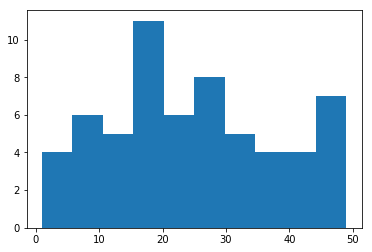

In [3]:
a = get_random_array(60)
print(f'a: {a}')
plt.hist(a, bins=10, orientation="vertical") # or horisotal

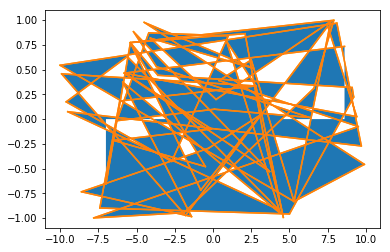

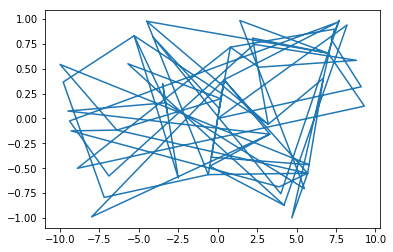

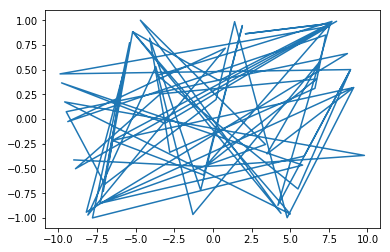

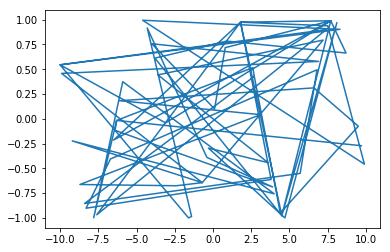

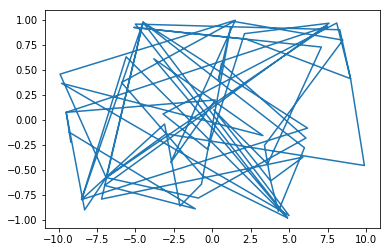

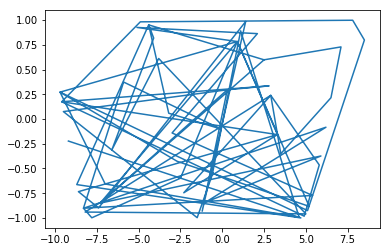

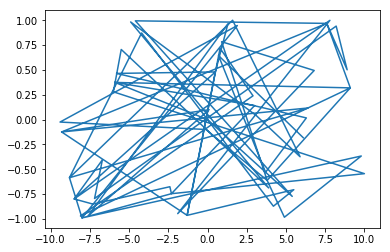

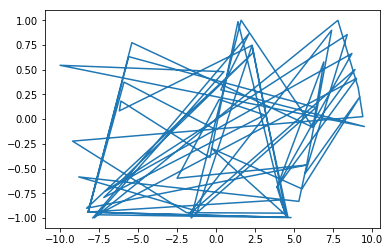

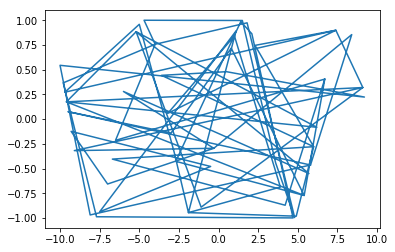

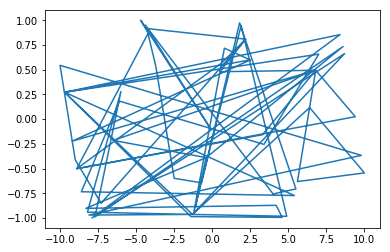

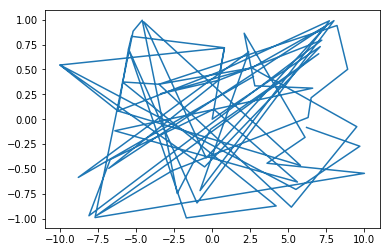

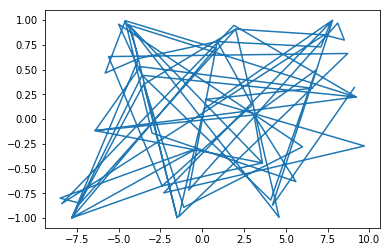

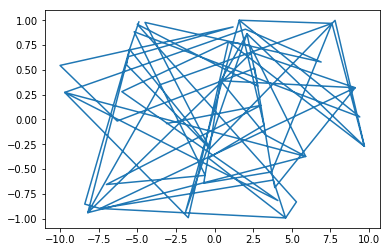

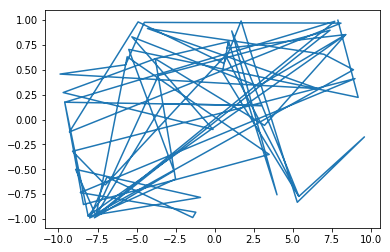

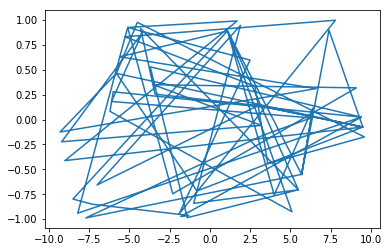

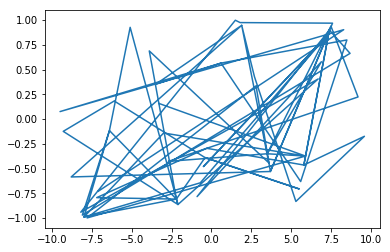

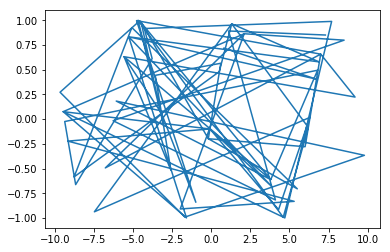

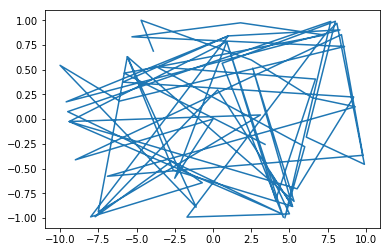

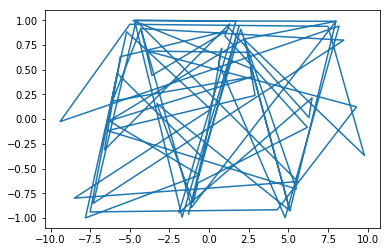

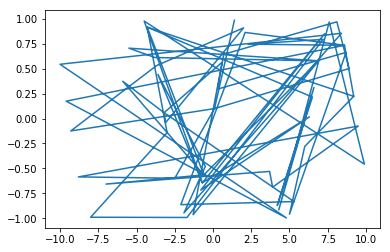

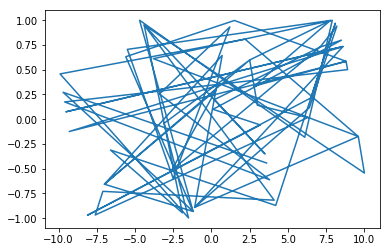

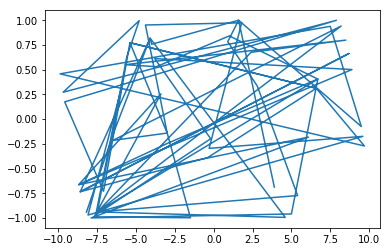

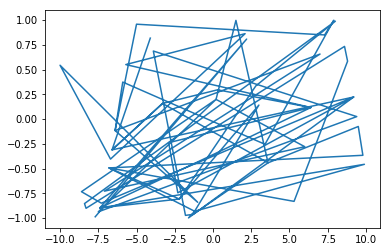

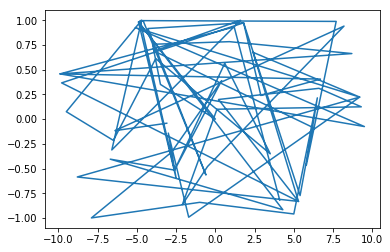

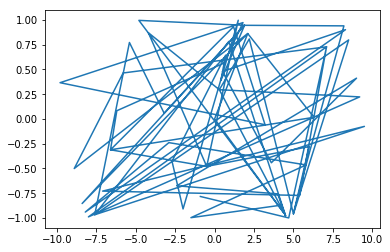

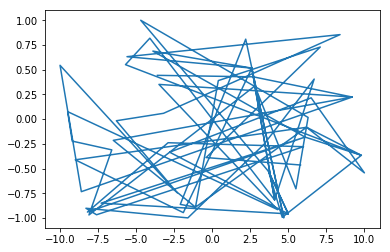

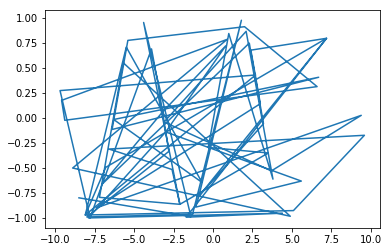

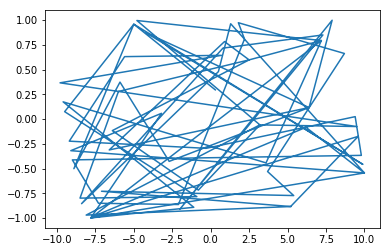

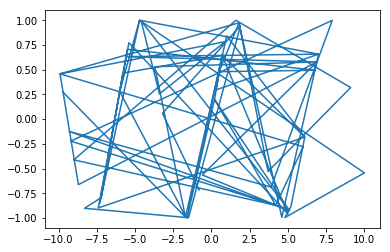

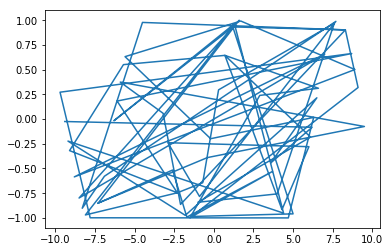

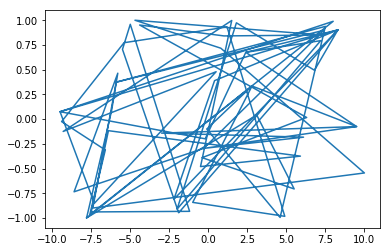

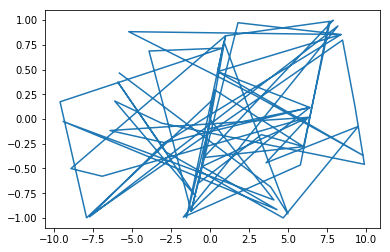

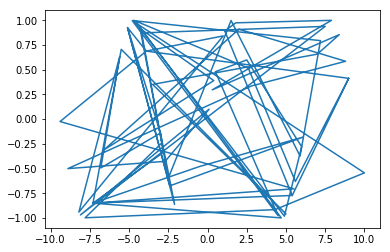

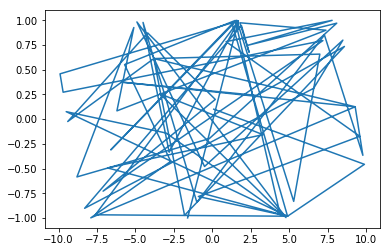

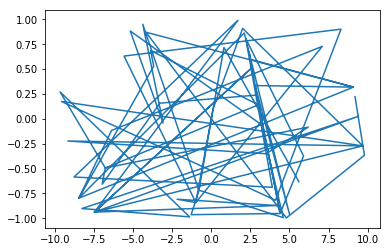

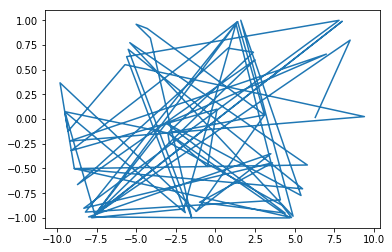

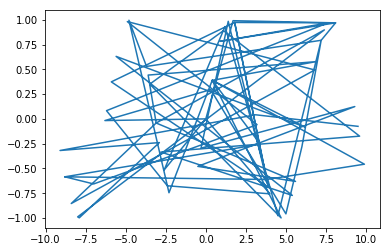

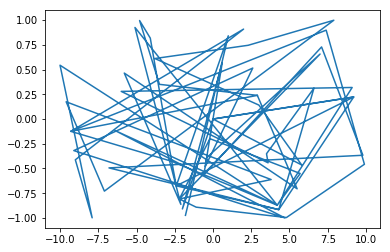

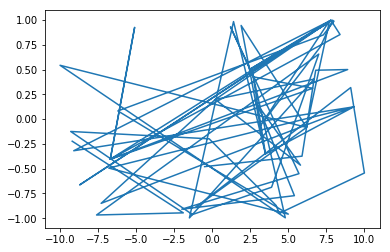

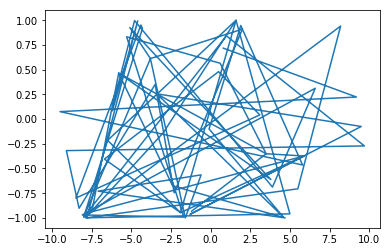

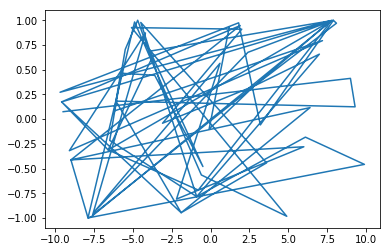

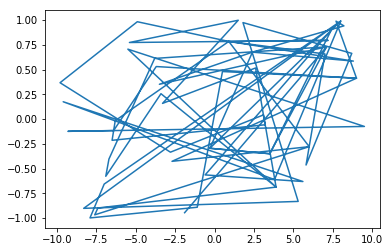

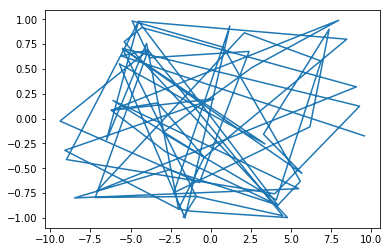

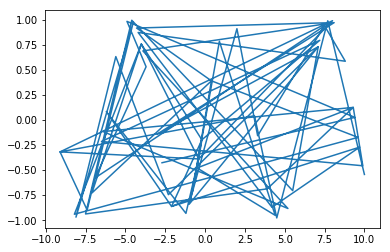

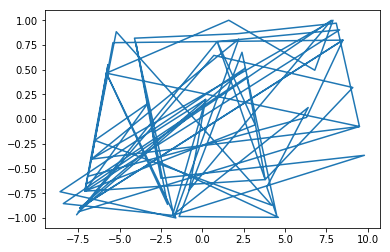

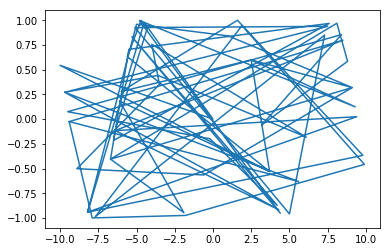

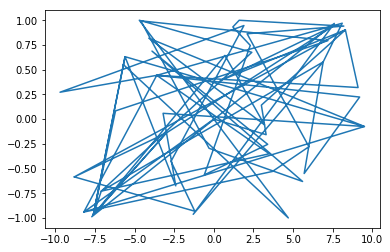

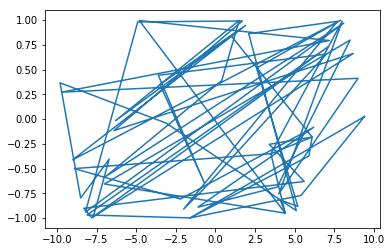

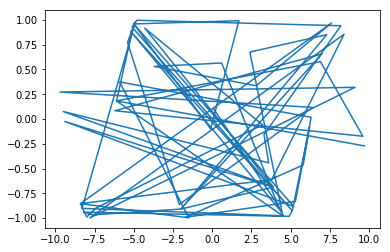

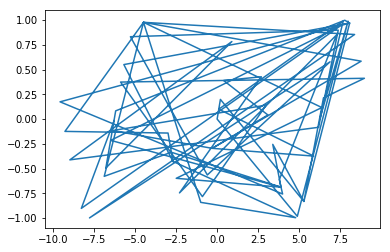

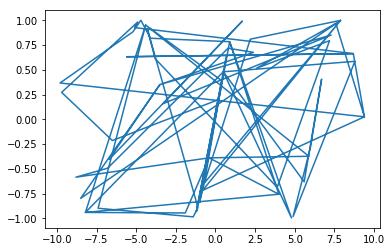

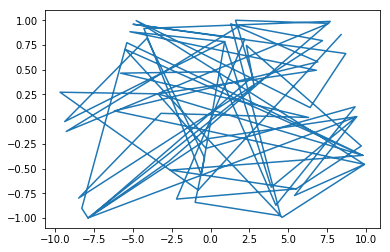

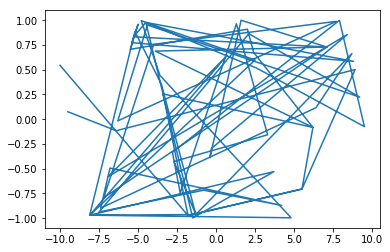

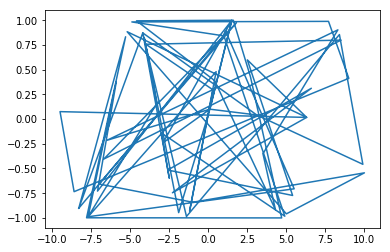

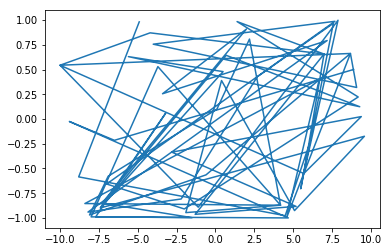

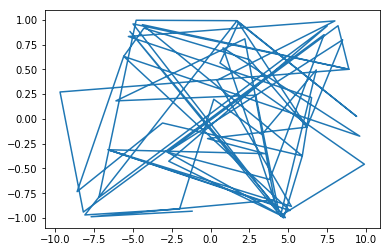

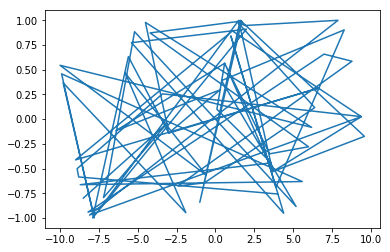

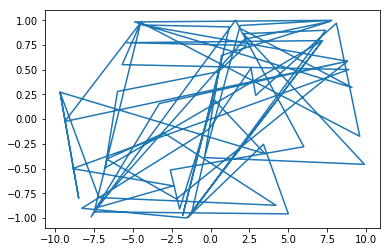

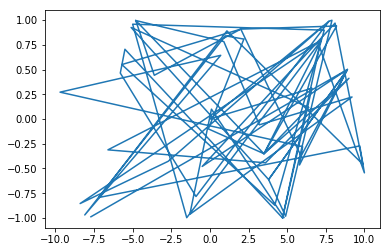

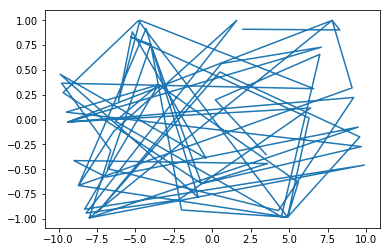

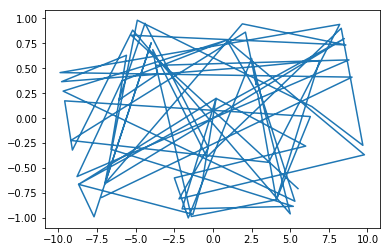

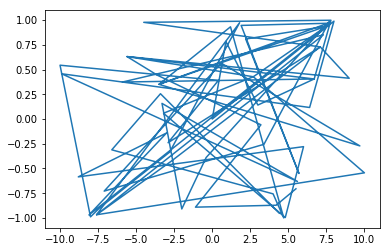

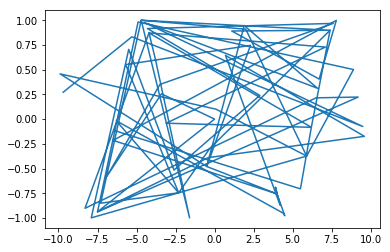

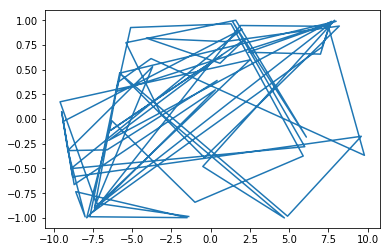

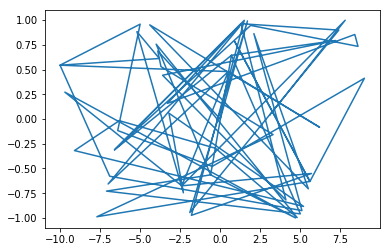

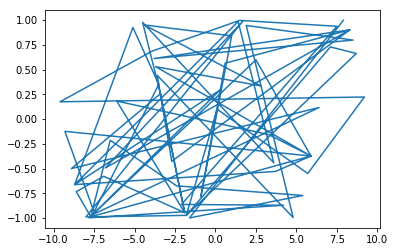

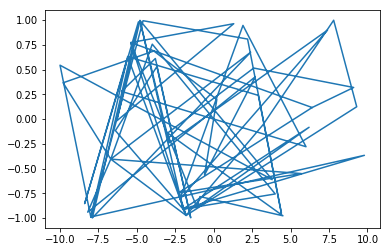

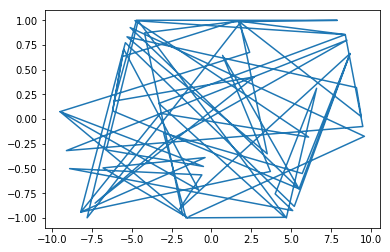

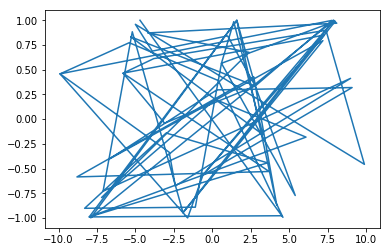

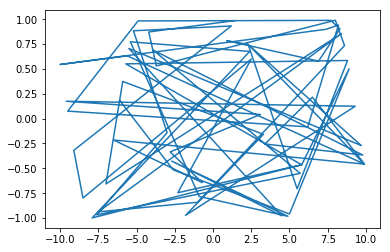

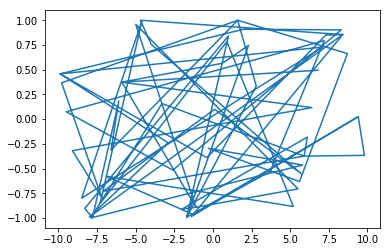

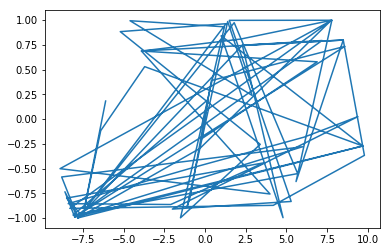

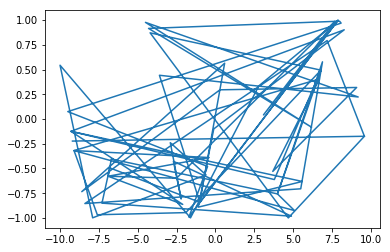

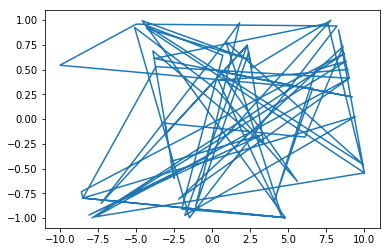

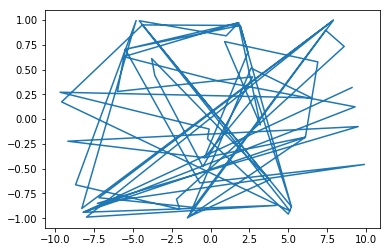

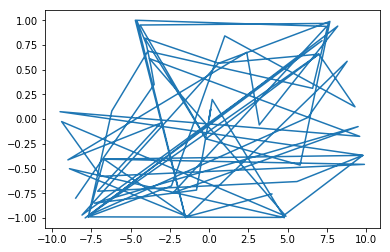

KeyboardInterrupt: 

In [28]:
fig, ax = plt.subplots(1, 1) 
while True: 
    x = [randfloat(-10, 10) for i in range(16*4)]
    sin_y = [math.sin(t) for t in x]
    ax.stackplot(x, sin_y)
    for i in range(len(x)-1):
        ax.plot([x[i], x[i+1]], [sin_y[i], sin_y[i+1]], color="orange")
    plt.plot(x, sin_y)
    plt.show()

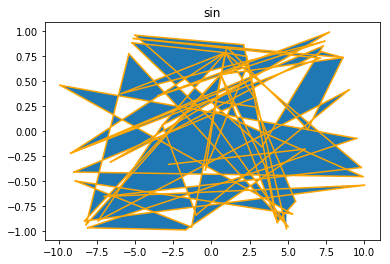

In [25]:
x = [randfloat(-10, 10) for i in range(16*4)]
sin_y = [math.sin(t) for t in x]
plt.title("sin")
plt.stackplot(x, sin_y)
for i in range(len(x)-1):
    plt.plot([x[i], x[i+1]], [sin_y[i], sin_y[i+1]], color="orange")
#plt.plot(x, sin_y)

In [27]:
Temp = lambda t: math.atan(-0.0012 * t**3 + 0.4 * t**2 + 0.616*t + 6120) + 0.65*math.sin(0.24 * t + 1.23) - 0.27*math.cos(0.21*t-0.17) - (math.sin(0.34*t + 0.16)/(1+0.03*(t-370.5)**2))

In [26]:
max_t = 10000
x = [i for i in range(-max_t, max_t)]
y = [Temp(i) for i in x]

t1 = time.time()
#ans = list(filter(lambda x: y[x] < 0 and y[x-1] > 0, range(1, len(y))))[0]
t2 = time.time()
print(f'Filter {t2-t1}secs')

t1 = time.time()
aaa = find_zero(Temp, x[0], x[-1],  1e-10)
t2 = time.time()
print(f'My {t2-t1}secs')

print(f"My x:{aaa}, y: {Temp(aaa)}")
#print("Filter", x[ans])
print(f"Перелом в {int(aaa)}")

plt.plot(x, y)
plt.plot(y, x)

x1 = x
y1 = y

sss = 5000

def sdvig(x, y, dx, dy, kf):
    ans_x = []
    for i in x:
        ans_x.append(i*kf+dx)
        
    ans_y = []
    for i in y:
        ans_y.append(i*kf+dy)
    return ans_x, ans_y

pws = 2
i = 1
# plt.plot(*sdvig(x, y, -5000, -5000, 1/pws))
# plt.plot(*sdvig(y, x, -5000, -5000, 1/pws))
# # plt.plot(*sdvig(x, y, -sss/(i+1), sss/(i+1), 1/pws))
# # plt.plot(*sdvig(x, y, sss/(i+1), -sss/(i+1), 1/pws))
# # plt.plot(*sdvig(x, y, -sss/(i+1), -sss/(i+1), 1/pws))

for i in range(5):
    pws = 2 ** (i+1)
    for i in range(pws):
        plt.plot(*sdvig(x, y, sss/(i+1), sss/(i+1), 0.6**i))#1/pws))
        plt.plot(*sdvig(x, y, -sss/(i+1), sss/(i+1), 0.6**i))#1/pws))
        plt.plot(*sdvig(x, y, sss/(i+1), -sss/(i+1), 0.6**i))#1/pws))
        plt.plot(*sdvig(x, y, -sss/(i+1), -sss/(i+1), 0.6**i))#1/pws))
        
        plt.plot(*sdvig(y, x, sss/(i+1), sss/(i+1), 0.6**i))#1/pws))
        plt.plot(*sdvig(y, x, -sss/(i+1), sss/(i+1), 0.6**i))#1/pws))
        plt.plot(*sdvig(y, x, sss/(i+1), -sss/(i+1), 0.6**i))#1/pws))
        plt.plot(*sdvig(y, x, -sss/(i+1), -sss/(i+1), 0.6**i))#1/pws))
        
    sss *=1.2
    
plt.show()

NameError: name 'Temp' is not defined

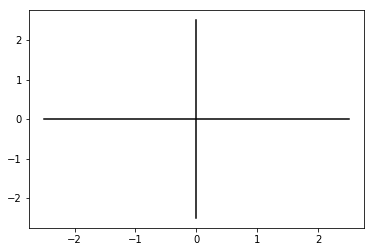

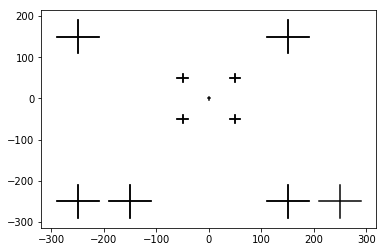

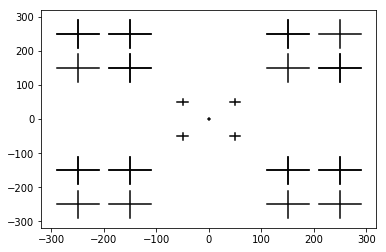

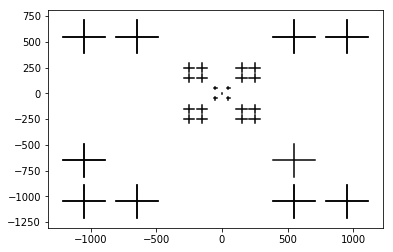

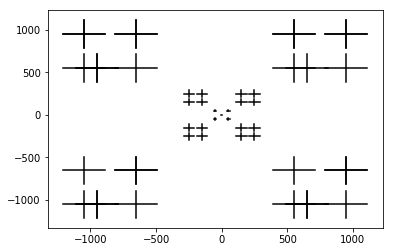

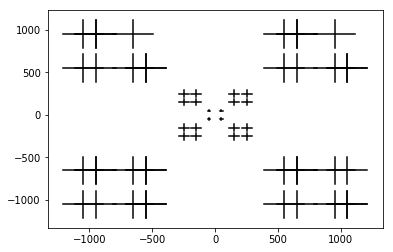

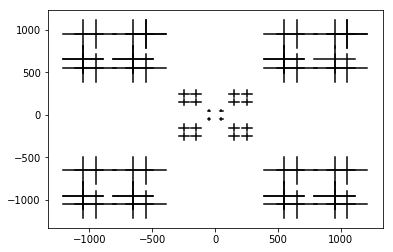

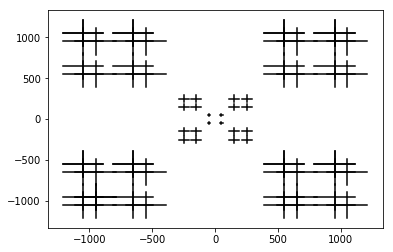

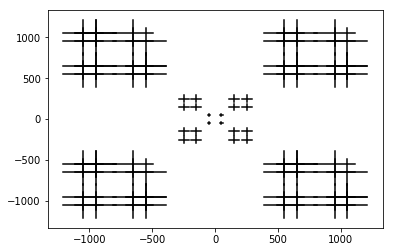

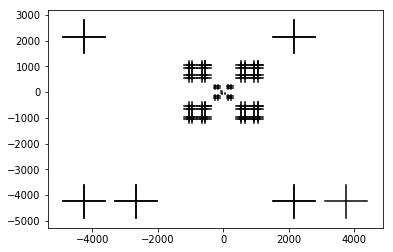

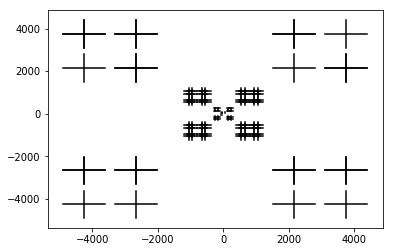

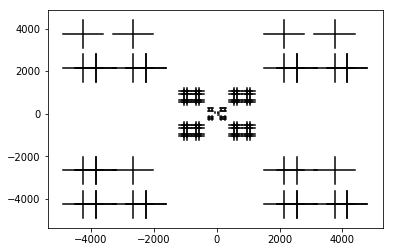

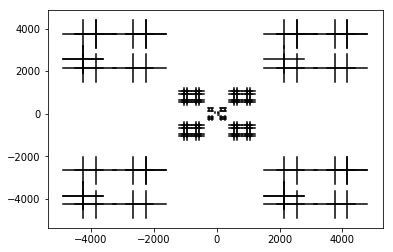

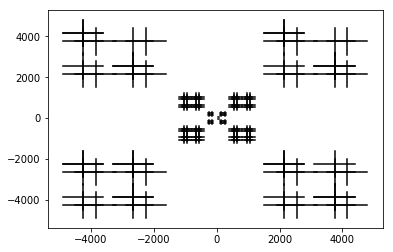

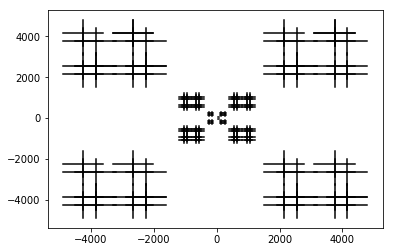

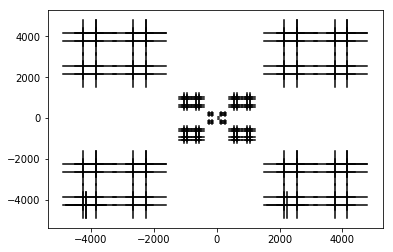

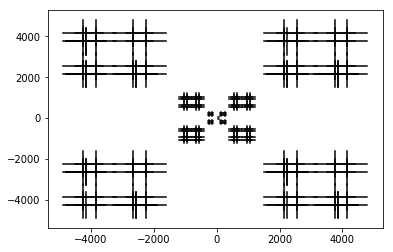

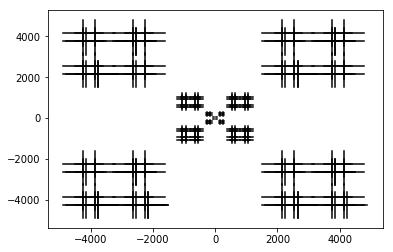

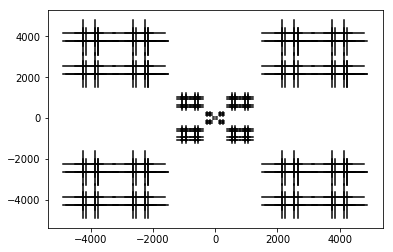

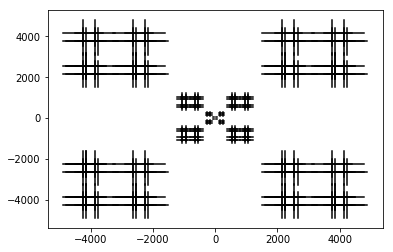

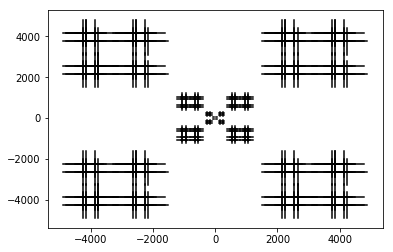

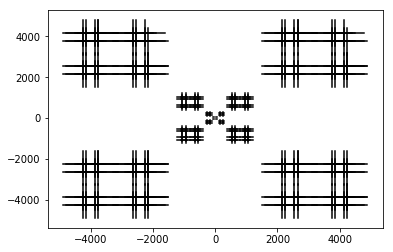

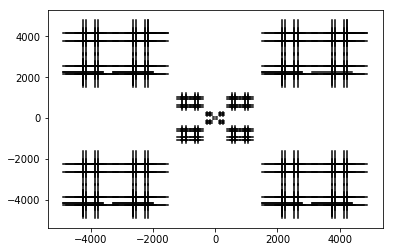

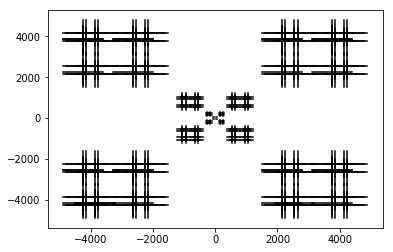

KeyboardInterrupt: 

In [13]:
def line(p1, p2, color='black'):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color=color)
    
def krest(p, size, color='black'):
    line((p[0]-size/2, p[1]), (p[0]+size/2, p[1]), color)
    line((p[0], p[1]-size/2), (p[0], p[1]+size/2), color)
    
queue = [((0,0), 5)]    

def draw_krests(n):
    for i in range(n):
        krest(*queue[i])

kf = 1/10
kf2 = 0.25
i = 0
while True:
    t = queue[i]
    
    krest(*t)
    if i % 10 == 0:
        draw_krests(i)
        plt.show()
    
    queue.append(((t[0][0] - t[1]/kf, t[0][1] - t[1]/kf), t[1]/kf2))
    queue.append(((t[0][0] + t[1]/kf, t[0][1] - t[1]/kf), t[1]/kf2))
    queue.append(((t[0][0] - t[1]/kf, t[0][1] + t[1]/kf), t[1]/kf2))
    queue.append(((t[0][0] + t[1]/kf, t[0][1] + t[1]/kf), t[1]/kf2))
    i += 1
    




#plt.plot(x, sin_y)